In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
data = pd.read_csv('flats.csv')
cian = pd.read_csv('flats_cian.csv')
data = pd.concat([data, cian])

In [3]:
data

,_id,type,max_floor,floor,square,kitchen,view_from_windows,trash,price,name,address,station,time,link,source,price_per_meter
0,5f346c7e73508dd587f40287,монолитный,16.0,12.0,302.00,35.0,"на улицу, во двор","[""балкон "",""собственник ""]",125000000.0,"7-к квартира, 302 м², 12/16 эт.","Москва, Большая Грузинская ул., 37с2",Белорусская,10.8,https://www.avito.ru/moskva/kvartiry/7-k_kvart...,Avito,NaN
1,5f346c8073508dd587f40288,кирпичный,8.0,4.0,54.90,9.0,на улицу,"[""балкон "",""собственник ""]",15900000.0,"2-к квартира, 54.9 м², 4/8 эт.","Москва, ул. Генерала Ермолова, 2",Парк Победы,3.6,https://www.avito.ru/moskva/kvartiry/2-k_kvart...,Avito,NaN
2,5f346c8273508dd587f40289,монолитный,52.0,30.0,71.00,15.0,NaN,"["" "",""\n ""]",21760000.0,"2-к квартира, 71 м², 30/52 эт.","пр-т Мичуринский, вл. 56",Раменки,9.6,https://www.avito.ru/moskva/kvartiry/2-k_kvart...,Avito,NaN
3,5f346c8473508dd587f4028a,монолитный,7.0,7.0,312.00,15.0,NaN,"[""посредник ""]",872200000.0,"5-к квартира, 312 м², 7/7 эт.","Москва, Ордынский тупик, 4",Третьяковская,2.4,https://www.avito.ru/moskva/kvartiry/5-k_kvart...,Avito,NaN
4,5f346c8673508dd587f4028b,кирпичный,33.0,25.0,21.20,5.0,NaN,"[""собственник ""]",5000000.0,"Студия, 21.2 м², 25/33 эт.","Москва, ул. Поляны, 5Ак4",Улица Скобелевская,9.6,https://www.avito.ru/moskva/kvartiry/studiya_2...,Avito,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,5f355450c52dfe7718ed087c,Новостройка,51.0,29.0,79.64,NaN,NaN,NaN,24688400.0,NaN,"Москва,ЦАО,р-н Пресненский,Шмитовский проезд",Деловой центр,4,https://www.cian.ru/sale/flat/237627960/,NaN,310000.0
1041,5f355453c52dfe7718ed087d,Новостройка,22.0,2.0,67.70,8.1,NaN,NaN,24517216.0,NaN,"Москва,ЦАО,р-н Красносельский,Большая Спасская...",Комсомольская,9,https://www.cian.ru/sale/flat/238223838/,NaN,362145.0
1042,5f355455c52dfe7718ed087e,Новостройка,16.0,14.0,68.80,NaN,NaN,NaN,24320800.0,NaN,"Москва,САО,р-н Хорошевский,ул. Викторенко,вл11",Аэропорт,9,https://www.cian.ru/sale/flat/228378004/,NaN,353500.0
1043,5f355458c52dfe7718ed087f,Новостройка Апартаменты,12.0,5.0,68.13,37.2,NaN,NaN,22012876.0,NaN,"Москва,ЦАО,р-н Басманный,Бакунинская ул.,5",Бауманская,2,https://www.cian.ru/sale/flat/236927926/,NaN,323101.0


In [4]:
data = data.drop(['_id', 'trash', 'name', 'link', 'source'],axis = 1)

In [5]:
data

,type,max_floor,floor,square,kitchen,view_from_windows,price,address,station,time,price_per_meter
0,монолитный,16.0,12.0,302.00,35.0,"на улицу, во двор",125000000.0,"Москва, Большая Грузинская ул., 37с2",Белорусская,10.8,NaN
1,кирпичный,8.0,4.0,54.90,9.0,на улицу,15900000.0,"Москва, ул. Генерала Ермолова, 2",Парк Победы,3.6,NaN
2,монолитный,52.0,30.0,71.00,15.0,NaN,21760000.0,"пр-т Мичуринский, вл. 56",Раменки,9.6,NaN
3,монолитный,7.0,7.0,312.00,15.0,NaN,872200000.0,"Москва, Ордынский тупик, 4",Третьяковская,2.4,NaN
4,кирпичный,33.0,25.0,21.20,5.0,NaN,5000000.0,"Москва, ул. Поляны, 5Ак4",Улица Скобелевская,9.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1040,Новостройка,51.0,29.0,79.64,NaN,NaN,24688400.0,"Москва,ЦАО,р-н Пресненский,Шмитовский проезд",Деловой центр,4,310000.0
1041,Новостройка,22.0,2.0,67.70,8.1,NaN,24517216.0,"Москва,ЦАО,р-н Красносельский,Большая Спасская...",Комсомольская,9,362145.0
1042,Новостройка,16.0,14.0,68.80,NaN,NaN,24320800.0,"Москва,САО,р-н Хорошевский,ул. Викторенко,вл11",Аэропорт,9,353500.0
1043,Новостройка Апартаменты,12.0,5.0,68.13,37.2,NaN,22012876.0,"Москва,ЦАО,р-н Басманный,Бакунинская ул.,5",Бауманская,2,323101.0


In [6]:
data.describe()

,max_floor,floor,square,kitchen,price,price_per_meter
count,5745.000000,5745.000000,5745.000000,3431.000000,5.745000e+03,1.045000e+03
mean,18.550044,9.662315,88.624211,13.362431,3.897457e+07,4.395780e+05
std,13.863038,10.303278,89.264038,8.225560,7.697754e+07,2.481631e+05
min,1.000000,1.000000,10.000000,1.000000,1.200000e+06,4.150000e+03
25%,9.000000,3.000000,43.300000,8.000000,8.420000e+06,2.672210e+05
50%,17.000000,7.000000,65.600000,11.500000,1.458627e+07,3.807110e+05
75%,23.000000,13.000000,106.900000,17.000000,3.760000e+07,5.434780e+05
max,100.000000,84.000000,2575.000000,100.000000,1.993500e+09,1.836327e+06


In [7]:
data = data.drop_duplicates()

In [8]:
data

,type,max_floor,floor,square,kitchen,view_from_windows,price,address,station,time,price_per_meter
0,монолитный,16.0,12.0,302.00,35.0,"на улицу, во двор",125000000.0,"Москва, Большая Грузинская ул., 37с2",Белорусская,10.8,NaN
1,кирпичный,8.0,4.0,54.90,9.0,на улицу,15900000.0,"Москва, ул. Генерала Ермолова, 2",Парк Победы,3.6,NaN
2,монолитный,52.0,30.0,71.00,15.0,NaN,21760000.0,"пр-т Мичуринский, вл. 56",Раменки,9.6,NaN
3,монолитный,7.0,7.0,312.00,15.0,NaN,872200000.0,"Москва, Ордынский тупик, 4",Третьяковская,2.4,NaN
4,кирпичный,33.0,25.0,21.20,5.0,NaN,5000000.0,"Москва, ул. Поляны, 5Ак4",Улица Скобелевская,9.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1040,Новостройка,51.0,29.0,79.64,NaN,NaN,24688400.0,"Москва,ЦАО,р-н Пресненский,Шмитовский проезд",Деловой центр,4,310000.0
1041,Новостройка,22.0,2.0,67.70,8.1,NaN,24517216.0,"Москва,ЦАО,р-н Красносельский,Большая Спасская...",Комсомольская,9,362145.0
1042,Новостройка,16.0,14.0,68.80,NaN,NaN,24320800.0,"Москва,САО,р-н Хорошевский,ул. Викторенко,вл11",Аэропорт,9,353500.0
1043,Новостройка Апартаменты,12.0,5.0,68.13,37.2,NaN,22012876.0,"Москва,ЦАО,р-н Басманный,Бакунинская ул.,5",Бауманская,2,323101.0


In [9]:
data.dtypes

type                  object
max_floor            float64
floor                float64
square               float64
kitchen              float64
view_from_windows     object
price                float64
address               object
station               object
time                  object
price_per_meter      float64
dtype: object

In [10]:
def missed_values(data):
    length = len(data)
    for i in data.columns:
        print(f'{i:30} {100 - data[i].isnull().value_counts()[0] / length * 100 :.3f}% {(length - data[i].isnull().value_counts()[0]):10}  {data[i].dtype} ')
missed_values(data)

type                           0.018%          1  object 
max_floor                      0.018%          1  float64 
floor                          0.018%          1  float64 
square                         0.018%          1  float64 
kitchen                        40.103%       2257  float64 
view_from_windows              71.215%       4008  object 
price                          0.018%          1  float64 
address                        0.000%          0  object 
station                        3.998%        225  object 
time                           3.092%        174  object 
price_per_meter                83.227%       4684  float64 


In [11]:
data = data.drop(['view_from_windows'], axis = 1)

In [12]:
data['kitchen'].fillna(data['kitchen'].mean(), inplace = True)

In [13]:
missed_values(data)

type                           0.018%          1  object 
max_floor                      0.018%          1  float64 
floor                          0.018%          1  float64 
square                         0.018%          1  float64 
kitchen                        0.000%          0  float64 
price                          0.018%          1  float64 
address                        0.000%          0  object 
station                        3.998%        225  object 
time                           3.092%        174  object 
price_per_meter                83.227%       4684  float64 


In [14]:
data.loc[data['type'].isnull()]

,type,max_floor,floor,square,kitchen,price,address,station,time,price_per_meter
4655,NaN,NaN,NaN,NaN,13.26283,NaN,"ул. Маресьева, стр. 7",Пионерская,1.2,NaN


In [15]:
data = data.drop(4655)

In [16]:
data

,type,max_floor,floor,square,kitchen,price,address,station,time,price_per_meter
0,монолитный,16.0,12.0,302.00,35.00000,125000000.0,"Москва, Большая Грузинская ул., 37с2",Белорусская,10.8,NaN
1,кирпичный,8.0,4.0,54.90,9.00000,15900000.0,"Москва, ул. Генерала Ермолова, 2",Парк Победы,3.6,NaN
2,монолитный,52.0,30.0,71.00,15.00000,21760000.0,"пр-т Мичуринский, вл. 56",Раменки,9.6,NaN
3,монолитный,7.0,7.0,312.00,15.00000,872200000.0,"Москва, Ордынский тупик, 4",Третьяковская,2.4,NaN
4,кирпичный,33.0,25.0,21.20,5.00000,5000000.0,"Москва, ул. Поляны, 5Ак4",Улица Скобелевская,9.6,NaN
...,...,...,...,...,...,...,...,...,...,...
1040,Новостройка,51.0,29.0,79.64,13.26283,24688400.0,"Москва,ЦАО,р-н Пресненский,Шмитовский проезд",Деловой центр,4,310000.0
1041,Новостройка,22.0,2.0,67.70,8.10000,24517216.0,"Москва,ЦАО,р-н Красносельский,Большая Спасская...",Комсомольская,9,362145.0
1042,Новостройка,16.0,14.0,68.80,13.26283,24320800.0,"Москва,САО,р-н Хорошевский,ул. Викторенко,вл11",Аэропорт,9,353500.0
1043,Новостройка Апартаменты,12.0,5.0,68.13,37.20000,22012876.0,"Москва,ЦАО,р-н Басманный,Бакунинская ул.,5",Бауманская,2,323101.0


In [17]:
missed_values(data)

type                           0.000%          0  object 
max_floor                      0.000%          0  float64 
floor                          0.000%          0  float64 
square                         0.000%          0  float64 
kitchen                        0.000%          0  float64 
price                          0.000%          0  float64 
address                        0.000%          0  object 
station                        3.999%        225  object 
time                           3.092%        174  object 
price_per_meter                83.224%       4683  float64 


In [18]:
data.drop('price_per_meter', axis = 1, inplace = True)

In [19]:
missed_values(data)

type                           0.000%          0  object 
max_floor                      0.000%          0  float64 
floor                          0.000%          0  float64 
square                         0.000%          0  float64 
kitchen                        0.000%          0  float64 
price                          0.000%          0  float64 
address                        0.000%          0  object 
station                        3.999%        225  object 
time                           3.092%        174  object 


In [20]:
data = data.dropna()

In [21]:
data

,type,max_floor,floor,square,kitchen,price,address,station,time
0,монолитный,16.0,12.0,302.00,35.00000,125000000.0,"Москва, Большая Грузинская ул., 37с2",Белорусская,10.8
1,кирпичный,8.0,4.0,54.90,9.00000,15900000.0,"Москва, ул. Генерала Ермолова, 2",Парк Победы,3.6
2,монолитный,52.0,30.0,71.00,15.00000,21760000.0,"пр-т Мичуринский, вл. 56",Раменки,9.6
3,монолитный,7.0,7.0,312.00,15.00000,872200000.0,"Москва, Ордынский тупик, 4",Третьяковская,2.4
4,кирпичный,33.0,25.0,21.20,5.00000,5000000.0,"Москва, ул. Поляны, 5Ак4",Улица Скобелевская,9.6
...,...,...,...,...,...,...,...,...,...
1040,Новостройка,51.0,29.0,79.64,13.26283,24688400.0,"Москва,ЦАО,р-н Пресненский,Шмитовский проезд",Деловой центр,4
1041,Новостройка,22.0,2.0,67.70,8.10000,24517216.0,"Москва,ЦАО,р-н Красносельский,Большая Спасская...",Комсомольская,9
1042,Новостройка,16.0,14.0,68.80,13.26283,24320800.0,"Москва,САО,р-н Хорошевский,ул. Викторенко,вл11",Аэропорт,9
1043,Новостройка Апартаменты,12.0,5.0,68.13,37.20000,22012876.0,"Москва,ЦАО,р-н Басманный,Бакунинская ул.,5",Бауманская,2


In [22]:
data['time'] = data['time'].astype('float64')

C:\Users\panaf\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data.dtypes

type          object
max_floor    float64
floor        float64
square       float64
kitchen      float64
price        float64
address       object
station       object
time         float64
dtype: object

In [24]:
data_with_address = data.copy()

In [25]:
data.drop(['address','type'], axis = 1, inplace = True)

C:\Users\panaf\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
data

,max_floor,floor,square,kitchen,price,station,time
0,16.0,12.0,302.00,35.00000,125000000.0,Белорусская,10.8
1,8.0,4.0,54.90,9.00000,15900000.0,Парк Победы,3.6
2,52.0,30.0,71.00,15.00000,21760000.0,Раменки,9.6
3,7.0,7.0,312.00,15.00000,872200000.0,Третьяковская,2.4
4,33.0,25.0,21.20,5.00000,5000000.0,Улица Скобелевская,9.6
...,...,...,...,...,...,...,...
1040,51.0,29.0,79.64,13.26283,24688400.0,Деловой центр,4.0
1041,22.0,2.0,67.70,8.10000,24517216.0,Комсомольская,9.0
1042,16.0,14.0,68.80,13.26283,24320800.0,Аэропорт,9.0
1043,12.0,5.0,68.13,37.20000,22012876.0,Бауманская,2.0


In [27]:
from sklearn.preprocessing import LabelEncoder
def preprocess_categorical(data, column):
    le = LabelEncoder()
    le.fit(data[column].tolist())
    data[column] = le.transform(data[column].tolist())

In [28]:
preprocess_categorical(data, 'station')

C:\Users\panaf\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
data

,max_floor,floor,square,kitchen,price,station,time
0,16.0,12.0,302.00,35.00000,125000000.0,19,10.8
1,8.0,4.0,54.90,9.00000,15900000.0,143,3.6
2,52.0,30.0,71.00,15.00000,21760000.0,169,9.6
3,7.0,7.0,312.00,15.00000,872200000.0,207,2.4
4,33.0,25.0,21.20,5.00000,5000000.0,219,9.6
...,...,...,...,...,...,...,...
1040,51.0,29.0,79.64,13.26283,24688400.0,51,4.0
1041,22.0,2.0,67.70,8.10000,24517216.0,75,9.0
1042,16.0,14.0,68.80,13.26283,24320800.0,10,9.0
1043,12.0,5.0,68.13,37.20000,22012876.0,15,2.0


In [30]:
data.reset_index(inplace = True, drop = True)

In [31]:
data

,max_floor,floor,square,kitchen,price,station,time
0,16.0,12.0,302.00,35.00000,125000000.0,19,10.8
1,8.0,4.0,54.90,9.00000,15900000.0,143,3.6
2,52.0,30.0,71.00,15.00000,21760000.0,169,9.6
3,7.0,7.0,312.00,15.00000,872200000.0,207,2.4
4,33.0,25.0,21.20,5.00000,5000000.0,219,9.6
...,...,...,...,...,...,...,...
5397,51.0,29.0,79.64,13.26283,24688400.0,51,4.0
5398,22.0,2.0,67.70,8.10000,24517216.0,75,9.0
5399,16.0,14.0,68.80,13.26283,24320800.0,10,9.0
5400,12.0,5.0,68.13,37.20000,22012876.0,15,2.0


In [32]:
from lightgbm import LGBMRegressor

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('price', axis = 1),data['price'], random_state = 42, test_size = 0.3 )

In [35]:
model = LGBMRegressor()

In [36]:
model.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
result = model.predict(x_test)

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mean_absolute_error(result, y_test)

12896642.545883553

In [40]:
print(y_test)

5018    12408145.0
4913    40500000.0
1807     7560000.0
2561    10423710.0
2857     4900500.0
           ...    
1258    18000000.0
4190     5713080.0
1451    43000000.0
2263    12500000.0
1116    14200000.0
Name: price, Length: 1621, dtype: float64


In [41]:
print(pd.Series(result))

0       2.248055e+07
1       5.236434e+07
2       7.074357e+06
3       7.794732e+06
4       5.663773e+06
            ...     
1616    2.720344e+07
1617    6.451630e+06
1618    4.364998e+07
1619    1.382931e+07
1620    1.867892e+07
Length: 1621, dtype: float64


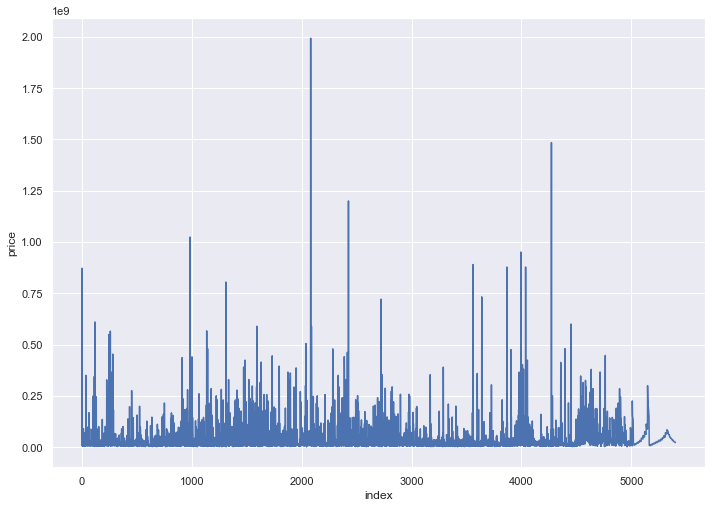

In [42]:
sns.lineplot(data.reset_index()['index'] , data['price'])

In [43]:
data.loc[data['price']> 0.1 * 10**9]

,max_floor,floor,square,kitchen,price,station,time
0,16.0,12.0,302.0,35.00000,125000000.0,19,10.8
3,7.0,7.0,312.0,15.00000,872200000.0,207,2.4
36,6.0,4.0,350.0,30.00000,350000000.0,3,3.6
65,17.0,10.0,224.0,13.26283,167900000.0,111,14.4
102,5.0,1.0,225.0,13.26283,249000000.0,39,16.8
...,...,...,...,...,...,...,...
5157,11.0,4.0,202.0,60.00000,183087750.0,89,17.0
5158,10.0,9.0,170.0,13.26283,174299538.0,126,11.0
5159,10.0,7.0,170.4,13.26283,160000000.0,126,11.0
5160,6.0,2.0,137.2,49.20000,153664000.0,158,6.0


In [44]:
def get_score(data):
    x_train, x_test, y_train, y_test = train_test_split(data.drop('price', axis = 1),data['price'], random_state = 42, test_size = 0.3 )
    model = LGBMRegressor()
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    print(mean_absolute_error(result, y_test))
    print(sns.barplot( data.drop('price', axis = 1).columns, model.feature_importances_))

5025233.280689166
AxesSubplot(0.125,0.125;0.775x0.755)


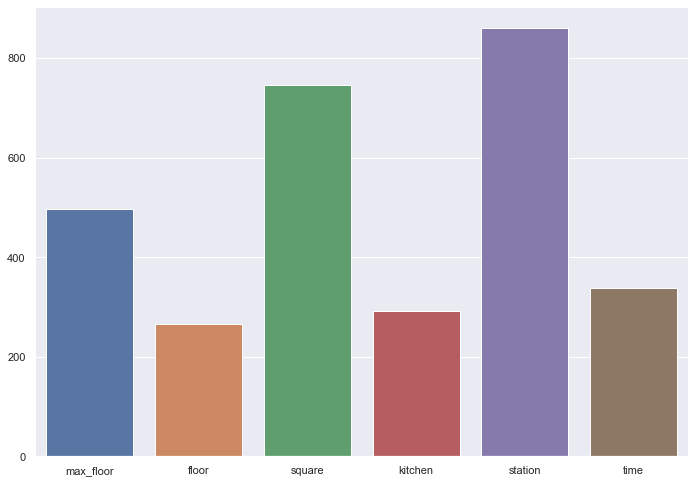

In [45]:
get_score(data.loc[data['price']< 0.1 * 10**9])

In [46]:
data.loc[data['price']< 0.1 * 10**9].mean()

max_floor    1.902651e+01
floor        9.709429e+00
square       7.304124e+01
kitchen      1.302008e+01
price        2.207555e+07
station      1.282106e+02
time         1.003011e+01
dtype: float64

7996379.886619808
AxesSubplot(0.125,0.125;0.775x0.755)


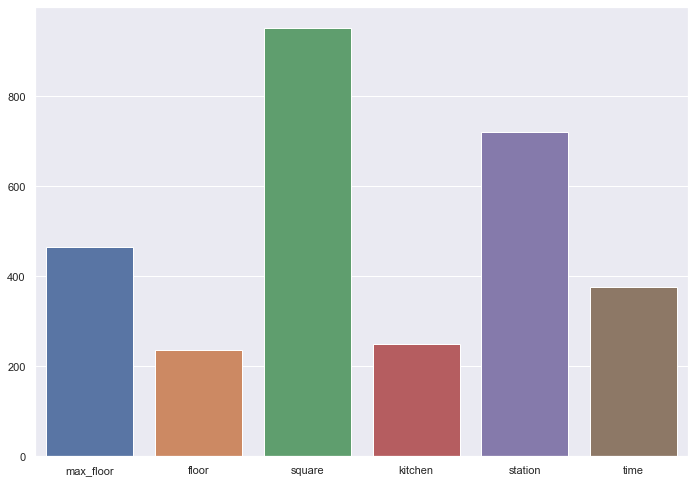

In [47]:
get_score(data.loc[data['price']< 0.25 * 10**9])

5025233.280689166
AxesSubplot(0.125,0.125;0.775x0.755)


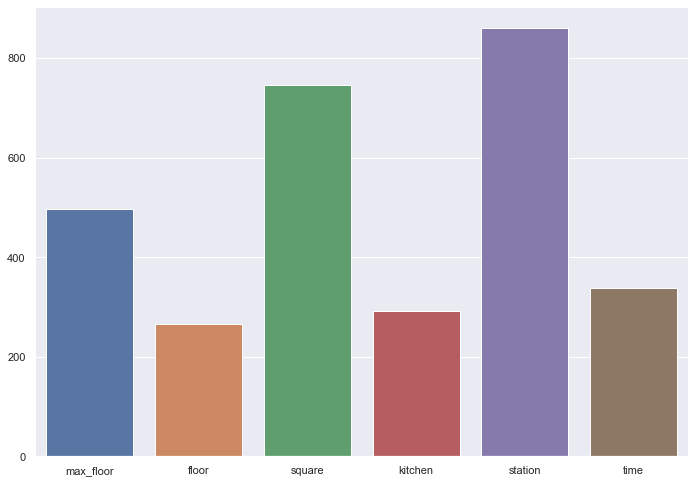

In [48]:
get_score(data.loc[data['price']< 0.1 * 10**9])

In [49]:
data1 = data.copy()
data1

,max_floor,floor,square,kitchen,price,station,time
0,16.0,12.0,302.00,35.00000,125000000.0,19,10.8
1,8.0,4.0,54.90,9.00000,15900000.0,143,3.6
2,52.0,30.0,71.00,15.00000,21760000.0,169,9.6
3,7.0,7.0,312.00,15.00000,872200000.0,207,2.4
4,33.0,25.0,21.20,5.00000,5000000.0,219,9.6
...,...,...,...,...,...,...,...
5397,51.0,29.0,79.64,13.26283,24688400.0,51,4.0
5398,22.0,2.0,67.70,8.10000,24517216.0,75,9.0
5399,16.0,14.0,68.80,13.26283,24320800.0,10,9.0
5400,12.0,5.0,68.13,37.20000,22012876.0,15,2.0


In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
def preprocess_data(data):
    data = data.drop(['_id', 'trash', 'name', 'link', 'source', 'view_from_windows', 'price_per_meter', 'address'],axis = 1)
    data = data.drop_duplicates()
    data['kitchen'].fillna(data['kitchen'].mean(), inplace = True)
    data = data.drop(data.loc[data['type'].isnull()].index)
    data = data.dropna()
    data['time'] = data['time'].astype('float64')
    preprocess_categorical(data, 'station')
    preprocess_categorical(data, 'type')
    data.reset_index(inplace = True, drop = True)
    data = data.loc[data['price']< 0.1 * 10**9]
    return data

In [52]:
def get_score(data, model):
    data = preprocess_data(data)
#     x_train, x_test, y_train, y_test = train_test_split(data.drop('price', axis = 1),data['price'], random_state = 42, test_size = 0.3 )
    model.fit(data.drop('price', axis = 1), data['price'])
    print('CROSS-VAL SCORE: ',cross_val_score(model, data.drop('price',axis = 1), data['price'], cv = 5, n_jobs = -1, scoring = 'neg_mean_absolute_error').mean())
    print(sns.barplot( data.drop('price', axis = 1).columns, model.feature_importances_))

In [53]:
data = pd.read_csv('flats.csv')
cian = pd.read_csv('flats_cian.csv')
data = pd.concat([data, cian])

CROSS-VAL SCORE:  -5045746.402244361
AxesSubplot(0.125,0.125;0.775x0.755)


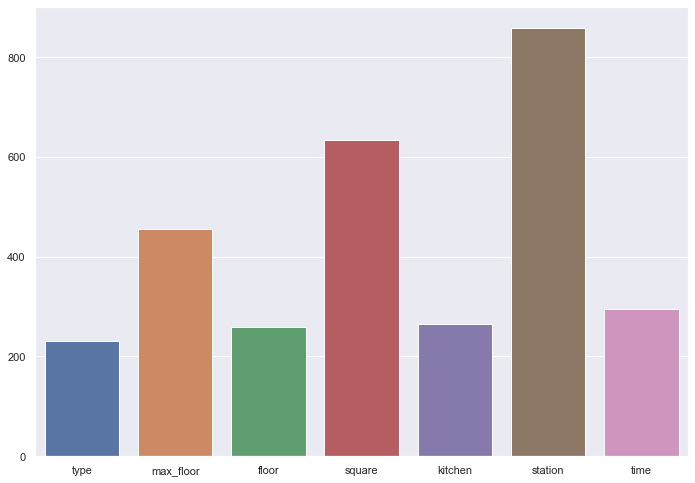

In [54]:
get_score(data, LGBMRegressor())

In [55]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

CROSS-VAL SCORE:  -5302546.44991002
AxesSubplot(0.125,0.125;0.775x0.755)


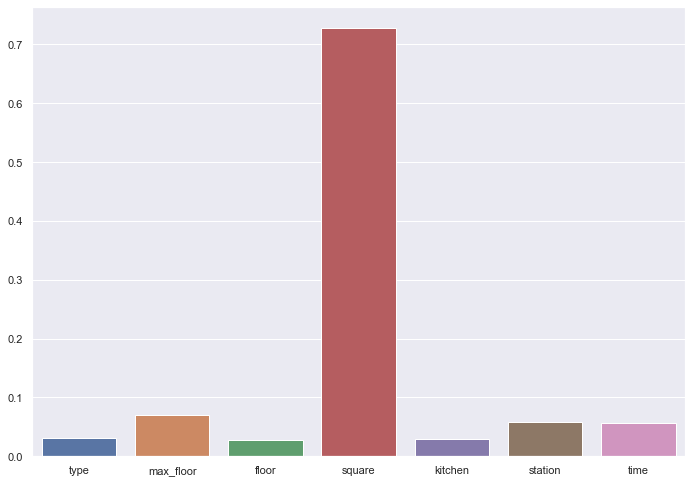

In [56]:
get_score(data, RandomForestRegressor())

[19:33:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CROSS-VAL SCORE:  -5856035.788164327
AxesSubplot(0.125,0.125;0.775x0.755)


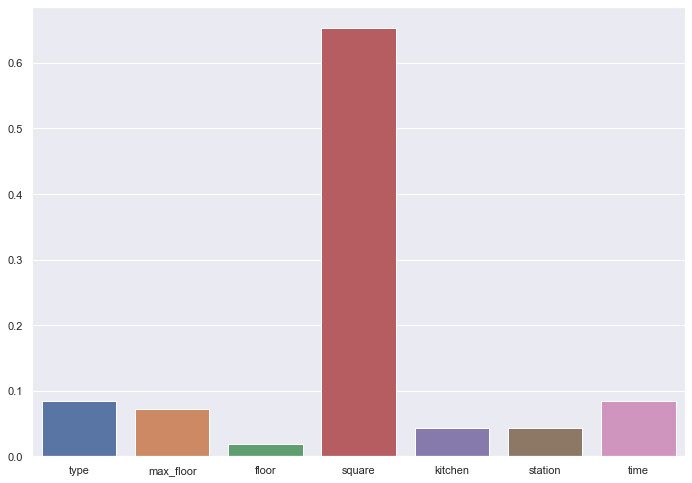

In [57]:
get_score(data, XGBRegressor())

In [58]:
def feature_gen(data):
#     data['square_coef'] = data['square'] / data['floor']
#     data['floor_coef'] = data['floor'] / data['max_floor']
#     data['kitchen_coef'] = data['kitchen'] / data['square']
#     data = data.drop(['kitchen'], axis = 1)
#     data = data.drop(['floor'], axis = 1)
#     data = data.drop(['type'], axis = 1)

    return data

In [97]:
def preprocess_data(data):
    data = data.reset_index().drop('index', axis = 1)
    data = data.drop(['_id', 'trash', 'name', 'link', 'source', 'view_from_windows', 'price_per_meter', 'address'],axis = 1)
    data = data.drop_duplicates()
    data['kitchen'].fillna(data['kitchen'].mean(), inplace = True)
    data = data.drop(data.loc[data['type'].isnull()].index)
    data = data.dropna()
    data['time'] = data['time'].astype('float64')
    preprocess_categorical(data, 'station')
    preprocess_categorical(data, 'type')
    data.reset_index(inplace = True, drop = True)
    data = data.loc[data['price']< 0.2 * 10**9]
    data = feature_gen(data)
    data = data.drop('type', axis = 1)
    return data

CROSS-VAL SCORE:  -7942054.6083699195
AxesSubplot(0.125,0.125;0.775x0.755)


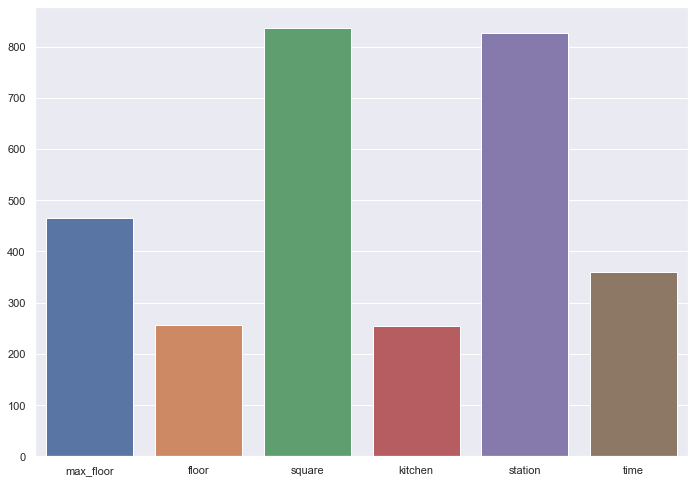

In [118]:
get_score(data, LGBMRegressor())

CROSS-VAL SCORE:  -8229735.235615735
AxesSubplot(0.125,0.125;0.775x0.755)


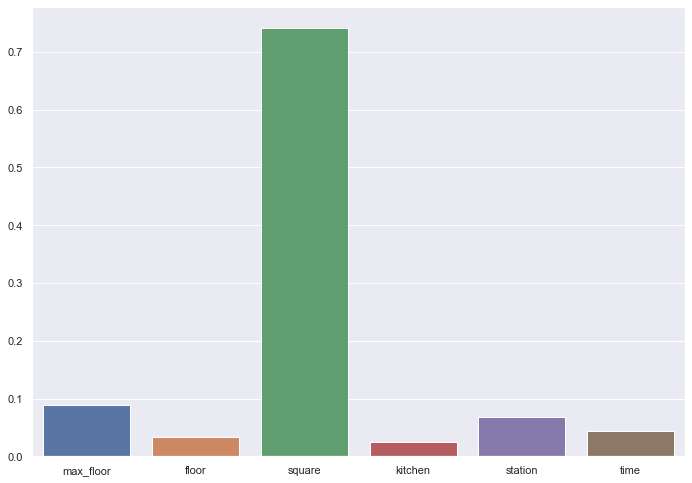

In [61]:
get_score(data, RandomForestRegressor())

[19:33:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CROSS-VAL SCORE:  -9025463.510922704
AxesSubplot(0.125,0.125;0.775x0.755)


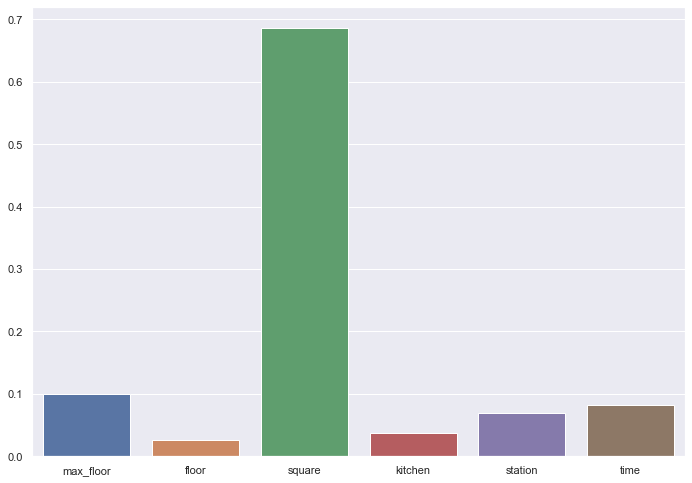

In [62]:
get_score(data, XGBRegressor())

In [78]:
def knn(data):
    model = KNeighborsRegressor(n_neighbors=10)
    print(cross_val_score(model, data.drop('price',axis = 1), data['price'], cv = 5, n_jobs = -1, scoring = 'neg_mean_absolute_error').mean())

In [79]:
knn(data)

-9328006.06171048


In [109]:
def part_of_df(df, start, end):
    return df[int(start * len(df)):int(end * len(df))]

In [123]:
def stacker_score(data):
    data = preprocess_data(data)
    forest = RandomForestRegressor()
    xgboost = XGBRegressor()
    first_half_df = part_of_df(data, 0,0.5)
    second_half_of_df = part_of_df(data, 0.51,1)
    forest.fit(first_half_df.drop('price', axis = 1), first_half_df['price'])
    second_half_of_df['forest'] = forest.predict(second_half_of_df.drop('price', axis = 1))
    
#     xgboost.fit(first_half_df.drop('price', axis = 1), first_half_df['price'])
#     second_half_of_df['xgb'] = xgboost.predict(second_half_of_df.drop(['price','forest'], axis = 1))
    
    lgbm = LGBMRegressor()
    lgbm.fit(second_half_of_df.drop('price', axis = 1), second_half_of_df['price'])
    print('CROSS-VAL SCORE: ',cross_val_score(lgbm, second_half_of_df.drop('price',axis = 1), second_half_of_df['price'], cv = 5, n_jobs = -1, scoring = 'neg_mean_absolute_error').mean())
    print(sns.barplot( second_half_of_df.drop('price', axis = 1).columns, lgbm.feature_importances_))

C:\Users\panaf\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CROSS-VAL SCORE:  -8917757.092642138
AxesSubplot(0.125,0.125;0.775x0.755)


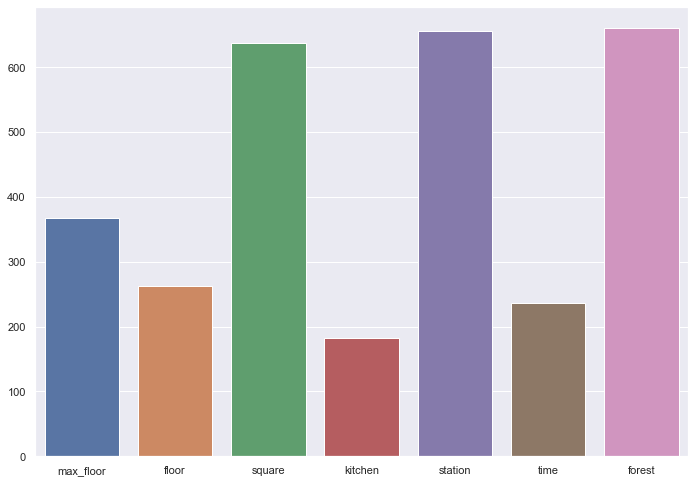

In [124]:
stacker_score(data)

In [198]:
from sklearn.model_selection import GridSearchCV

In [209]:
def get_score(data):
    data = preprocess_data(data)
    params = {
    'n_estimators':[500],
    'max_depth':[12],
    'min_child_weight':[1],
    'learning_rate':[0.1,0.15,0.2],
    }
    model = GridSearchCV(estimator = LGBMRegressor(),    
    param_grid = params,
    scoring = 'neg_mean_absolute_error',
    cv = 5,
    n_jobs = -1)
    model.fit(data.drop('price', axis = 1), data['price'])
    print('CROSS-VAL SCORE: ',cross_val_score(model, data.drop('price',axis = 1), data['price'], cv = 5, n_jobs = -1, scoring = 'neg_mean_absolute_error').mean())
    print(model.best_params_)

In [210]:
get_score(data)

CROSS-VAL SCORE:  -7627628.868266052
{'learning_rate': 0.15, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 500}


In [214]:
final = LGBMRegressor(n_estimators=500, max_depth=12, min_child_weight=1, learning_rate=0.15)

In [215]:
final.fit(d.drop('price', axis = 1), d['price'])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.15, max_depth=12,
              min_child_samples=20, min_child_weight=1, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [216]:
final.booster_.save_model('model.txt')

In [217]:
import lightgbm as lgb

In [218]:
lgb.Dataset(d)

In [90]:
m.booster_.save_model('model.txt')